In [1]:
import pandas as pd
import numpy as np
import datetime
import vnquant.data.dataloader as dl
import investpy
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pyfolio as pf
from scipy.stats import norm,t
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#stock data
def load_stock_data(symbol):
    StockList = pd.read_csv('StockList.csv',index_col='Ticker')
    start = '2019-01-01'
    
    #you can fix the time frame by using timedelta function of datetime library
    now = datetime.datetime.now()
    end = now.strftime("%Y-%m-%d")
    loader = dl.DataLoader(symbol, start,end, data_source='VND', minimal=True)
    data = loader.download()
    data['PctChange'] = data.close.pct_change()
    data.dropna(inplace=True)
    
    if StockList.loc[symbol].values == 'HOSE':
        data = data[data['PctChange']>= -0.07]
    elif StockList.loc[symbol].values == 'HNX':
        data = data[data['PctChange']>= -0.10]
    else: 
        data = data[data['PctChange']>= -0.15]

    return data

#index data
def load_index_data(x):
    end = datetime.datetime.now()
    index =investpy.get_index_historical_data(x,country='vietnam',from_date='01/01/2019',to_date=end.strftime('%d/%m/%Y'))
    index = pd.DataFrame(index)
    index = index.drop(columns =['Currency'])
    index = index.reset_index()
    index = index.rename(columns={'Date':'date','Open':'open' ,'Close':'close','High':'high','Low':'low','Volume':'volume'})
    index = index.set_index('date')

    index['PctChange'] = index.close.pct_change()
    index.dropna(inplace = True)
    return index

In [5]:
def export_index_csv(index):
    d = {}
    df = pd.DataFrame()
    
    if index == 'VN30':
        VN30 = pd.read_csv('VN30.csv')
        VN30 = VN30['Ticker'].values.tolist()
        for name in VN30:
            d[name] = load_stock_data(name)
            df[name]= d[name].close
        df.to_csv(r'VN30_price.csv')
    if index == 'VN100':
        VN100 = pd.read_csv('VN100.csv')
        VN100 = VN100['Ticker'].values.tolist()
        for name in VN100:
            d[name] = load_stock_data(name)
            df[name]= d[name].close
        df.to_csv(r'VN100_price.csv')
        

In [6]:
export_index_csv('VN30')

2022-07-16 08:48:07,861 : INFO : data ACB from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:08,142 : INFO : data BID from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:08,395 : INFO : data BVH from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:08,668 : INFO : data CTG from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:08,972 : INFO : data FPT from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:09,219 : INFO : data GAS from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:09,499 : INFO : data GVR from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:09,769 : INFO : data HDB from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:10,102 : INFO : data HPG from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:10,415 : INFO : data KDH from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:10,803 : INFO : data MBB from 2019-01-01 to 2022-07-1

In [7]:
export_index_csv('VN100')

2022-07-16 08:48:18,687 : INFO : data AAA from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:18,955 : INFO : data ACB from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:19,226 : INFO : data AGG from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:19,529 : INFO : data ANV from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:19,784 : INFO : data APH from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:20,147 : INFO : data ASM from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:20,380 : INFO : data BID from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:20,760 : INFO : data BMI from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:21,099 : INFO : data BMP from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:21,379 : INFO : data BVH from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:21,689 : INFO : data BWE from 2019-01-01 to 2022-07-1

2022-07-16 08:48:46,106 : INFO : data VGC from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:46,436 : INFO : data VHC from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:46,698 : INFO : data VHM from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:47,010 : INFO : data VIB from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:47,258 : INFO : data VIC from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:47,520 : INFO : data VJC from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:47,772 : INFO : data VNM from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:48,012 : INFO : data VPB from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:48,515 : INFO : data VPI from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:48,754 : INFO : data VRE from 2019-01-01 to 2022-07-16 have already cloned!
2022-07-16 08:48:49,066 : INFO : data VSH from 2019-01-01 to 2022-07-1

In [58]:
VN30 = pd.read_csv('VN30.csv')
VN30 = VN30['Ticker'].values.tolist()
df30 = pd.read_csv('VN30_price.csv',index_col='date')


VN100 = pd.read_csv('VN100.csv')
VN100 = VN100['Ticker'].values.tolist()
df100 = pd.read_csv('VN100_price.csv',index_col='date')


In [114]:
count = pd.DataFrame(df30.count(),columns=['count'])

In [115]:
count

,count
ACB,817
BID,817
BVH,817
CTG,817
FPT,817
GAS,817
GVR,817
HDB,817
HPG,817
KDH,817


In [118]:
threshold = int(count.quantile(0.05))
for name in VN30:
    if count.loc[name].values < threshold:
        print(name, count.loc[name].values)
        df30.drop([name],axis=1,inplace=True)

In [120]:
df30.dropna(inplace=True)

In [121]:
df30.describe()

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,28.373256,40.235863,62.748103,28.410098,67.896695,93.633293,21.196450,27.392840,35.301591,32.661567,...,18.041530,32.783782,27.961261,85.100734,85.227540,103.569400,124.357038,105.898286,31.800979,31.028152
std,4.933386,4.858184,13.667536,8.021134,21.117571,15.109655,10.284249,3.163761,12.215582,9.637131,...,8.222483,12.605735,8.109756,12.330434,12.197722,14.888658,12.207453,19.775691,14.542745,3.589581
min,17.800000,29.500000,34.550000,17.200000,41.100000,54.800000,8.380000,17.800000,16.200000,18.300000,...,7.300000,15.000000,16.200000,54.800000,54.800000,67.500000,94.500000,64.500000,16.950000,17.700000
25%,23.750000,36.300000,53.600000,21.350000,49.000000,83.500000,12.150000,25.500000,23.600000,24.500000,...,11.050000,22.000000,21.800000,77.600000,77.900000,92.600000,115.500000,89.000000,21.050000,28.200000
50%,29.000000,40.500000,58.900000,26.300000,57.400000,95.000000,15.400000,27.000000,32.100000,30.550000,...,13.450000,26.300000,23.900000,85.000000,83.500000,105.400000,125.000000,107.700000,24.900000,31.200000
75%,32.700000,43.300000,71.200000,33.400000,90.500000,104.800000,30.700000,29.200000,46.400000,39.200000,...,26.600000,48.500000,34.050000,96.500000,92.000000,115.800000,132.000000,123.000000,36.800000,34.000000
max,45.900000,55.500000,98.300000,54.400000,116.600000,130.000000,42.100000,37.400000,67.800000,56.800000,...,35.850000,58.000000,52.000000,116.400000,120.000000,144.000000,149.000000,151.600000,72.700000,38.000000


In [122]:
df.describe()

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
count,870.000000,869.000000,870.000000,869.000000,866.000000,870.000000,863.000000,867.000000,866.000000,868.000000,...,870.000000,870.000000,868.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,870.000000
mean,28.360862,40.086594,62.603908,28.297641,67.801039,93.352069,21.189224,27.376413,35.203926,32.682834,...,18.030885,32.755057,27.902535,84.753280,85.013464,103.228999,123.935673,105.683199,31.821922,30.890172
std,4.965748,4.915210,13.823746,8.044218,21.264646,15.316038,10.343245,3.194378,12.178079,9.613712,...,8.217724,12.634729,8.065245,12.628947,12.312354,14.811770,12.205857,19.828931,14.718685,3.599072
min,17.800000,29.500000,34.550000,17.200000,40.800000,54.800000,8.380000,17.800000,16.200000,18.300000,...,7.300000,15.000000,16.200000,53.600000,54.800000,67.500000,94.500000,64.500000,16.950000,17.700000
25%,23.700000,36.000000,53.400000,21.300000,48.800000,83.350000,12.100000,25.500000,23.650000,24.537500,...,11.062500,22.000000,21.800000,77.000000,77.500000,92.500000,115.200000,88.800000,21.000000,28.000000
50%,28.925000,40.350000,58.600000,26.200000,57.150000,94.550000,15.400000,27.000000,32.050000,30.800000,...,13.450000,26.125000,23.900000,84.800000,83.100000,105.000000,124.600000,107.500000,24.700000,31.000000
75%,32.700000,43.200000,71.275000,33.200000,90.775000,104.600000,30.700000,29.200000,46.300000,39.250000,...,26.600000,48.487500,34.125000,96.400000,91.900000,115.800000,131.800000,123.000000,36.800000,34.000000
max,45.900000,55.500000,98.300000,54.400000,116.600000,134.000000,42.100000,37.400000,67.800000,56.800000,...,35.850000,58.000000,52.000000,116.400000,120.000000,144.000000,149.000000,151.600000,72.700000,38.000000


In [123]:
df2 = df30

In [124]:
df2 = np.log(df2)
df2

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2019-01-15,3.370738,3.481240,4.485260,2.939162,3.756538,4.503137,2.240710,3.374169,3.377588,3.402863,...,2.424803,3.277145,3.049273,4.023564,4.380776,4.620059,4.763882,4.904534,2.957511,3.433987
2019-01-16,3.360375,3.471966,4.499810,2.928524,3.750680,4.506454,2.261763,3.374169,3.382694,3.402863,...,2.424803,3.277145,3.034953,4.014580,4.385770,4.624973,4.753590,4.890349,2.988204,3.448399
2019-01-17,3.363842,3.464172,4.520701,2.915064,3.737670,4.488636,2.251292,3.363842,3.363842,3.401197,...,2.415914,3.282789,3.030134,4.010963,4.379524,4.624973,4.749271,4.884316,2.944439,3.404525
2019-01-18,3.353407,3.456317,4.520701,2.901422,3.737670,4.488636,2.272126,3.370738,3.374169,3.396185,...,2.420368,3.286534,3.034953,4.003690,4.388257,4.626932,4.746670,4.897840,2.957511,3.375880
2019-01-21,3.384390,3.491952,4.521789,2.967847,3.749504,4.505350,2.282382,3.389462,3.386084,3.396185,...,2.459589,3.310543,3.044522,4.021774,4.388257,4.628887,4.746670,4.896346,2.995732,3.377588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,3.157000,3.540959,4.000034,3.238678,4.416428,4.552824,3.042139,3.131137,3.093313,3.555348,...,3.093313,3.572346,3.258097,4.276666,4.102643,4.248495,4.847332,4.290459,3.314186,3.258097
2022-07-12,3.178054,3.594569,4.023564,3.246491,4.424847,4.595120,3.109061,3.157000,3.104587,3.572346,...,3.117950,3.586293,3.284664,4.275276,4.097672,4.247066,4.832306,4.294561,3.323236,3.265759
2022-07-13,3.178054,3.584907,4.060443,3.279030,4.412798,4.567468,3.115735,3.165475,3.104587,3.565298,...,3.137666,3.586293,3.282789,4.273884,4.096010,4.241327,4.826712,4.283587,3.323236,3.267666


In [125]:
df2.count()*80/100

ACB    653.6
BID    653.6
BVH    653.6
CTG    653.6
FPT    653.6
GAS    653.6
GVR    653.6
HDB    653.6
HPG    653.6
KDH    653.6
MBB    653.6
MSN    653.6
MWG    653.6
NVL    653.6
PDR    653.6
PLX    653.6
PNJ    653.6
POW    653.6
SAB    653.6
SSI    653.6
STB    653.6
TCB    653.6
TPB    653.6
VCB    653.6
VHM    653.6
VIC    653.6
VJC    653.6
VNM    653.6
VPB    653.6
VRE    653.6
dtype: float64

In [126]:
train = df2.iloc[:]
#test = df2.iloc[201:]

In [127]:
from mlpairs import OpticsPairs

In [128]:
op = OpticsPairs(train)
op.returns.head()

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
date,,,,,,,,,,,,,,,,,,,,,
2019-01-16,-0.003074,-0.002664,0.003244,-0.003620,-0.001559,0.000737,0.009396,0.000000,0.001512,0.000000,...,0.000000,0.000000,-0.004696,-0.002233,0.001140,0.001064,-0.002160,-0.002892,0.010378,0.004197
2019-01-17,0.001031,-0.002245,0.004643,-0.004596,-0.003469,-0.003954,-0.004630,-0.003061,-0.005573,-0.000489,...,-0.003666,0.001722,-0.001588,-0.000901,-0.001424,0.000000,-0.000909,-0.001234,-0.014646,-0.012723
2019-01-18,-0.003102,-0.002268,0.000000,-0.004680,0.000000,0.000000,0.009254,0.002050,0.003070,-0.001474,...,0.001844,0.001141,0.001590,-0.001813,0.001994,0.000424,-0.000548,0.002769,0.004440,-0.008414
2019-01-21,0.009239,0.010310,0.000241,0.022894,0.003166,0.003724,0.004514,0.005555,0.003531,0.000000,...,0.016204,0.007305,0.003153,0.004517,0.000000,0.000423,0.000000,-0.000305,0.012923,0.000506
2019-01-22,-0.004034,-0.000873,-0.004861,0.001728,-0.000943,-0.001971,-0.018258,0.004444,-0.000500,0.001966,...,0.001734,-0.006688,0.000000,-0.002688,-0.002562,0.000000,-0.000366,0.000305,-0.005893,-0.003558


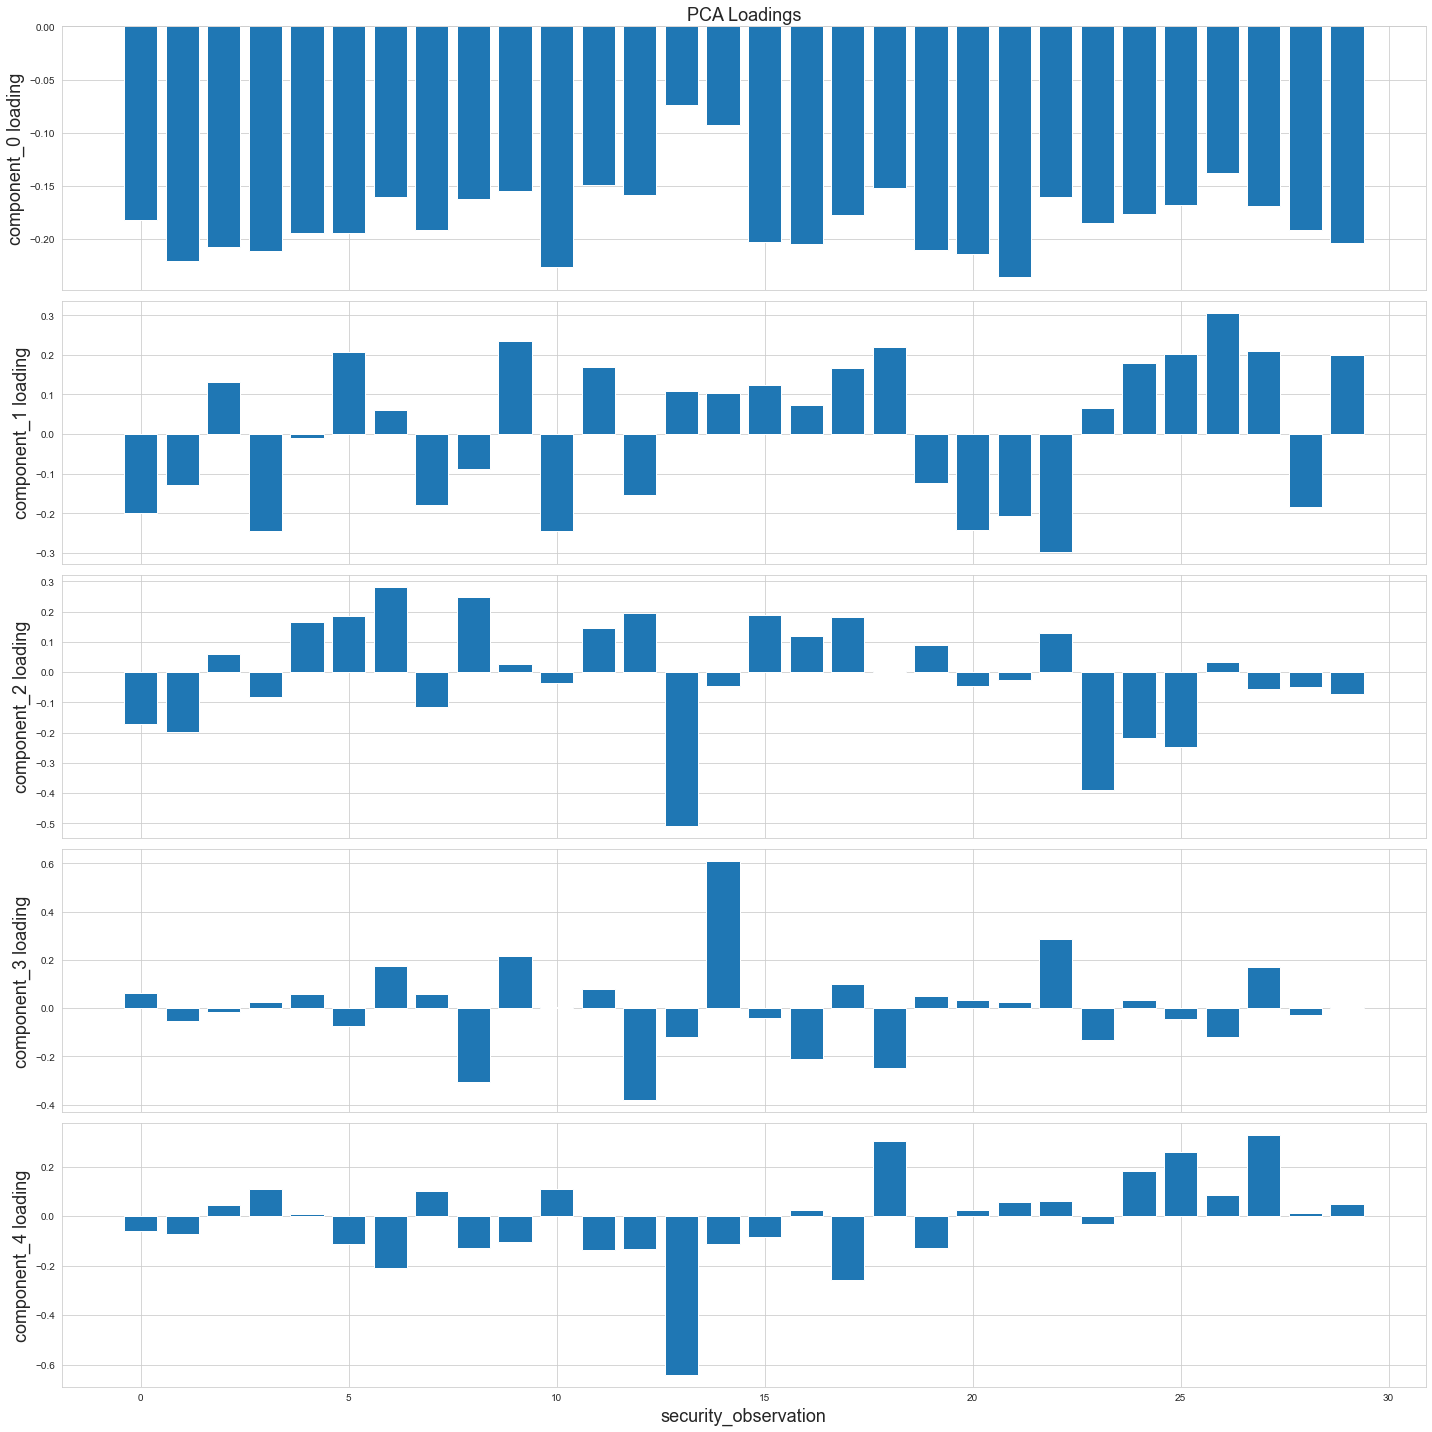

In [129]:
op.reduce_PCA()
op.plot_loadings()

Total variance explained: 71.0%


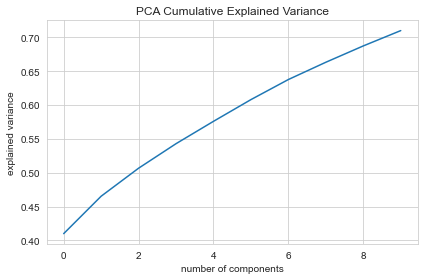

In [130]:
op.plot_explained_variance()
total_variance_explained = np.cumsum(op.explained_variance_ratio_)[-1]
print(f"Total variance explained: {round(total_variance_explained, 2)*100}%")

In [131]:
op.find_pairs()
op.pairs

Found 435 potential pairs


0      (ACB, BID)
1      (ACB, BVH)
2      (ACB, CTG)
3      (ACB, FPT)
4      (ACB, GAS)
          ...    
430    (VJC, VPB)
431    (VJC, VRE)
432    (VNM, VPB)
433    (VNM, VRE)
434    (VPB, VRE)
Length: 435, dtype: object

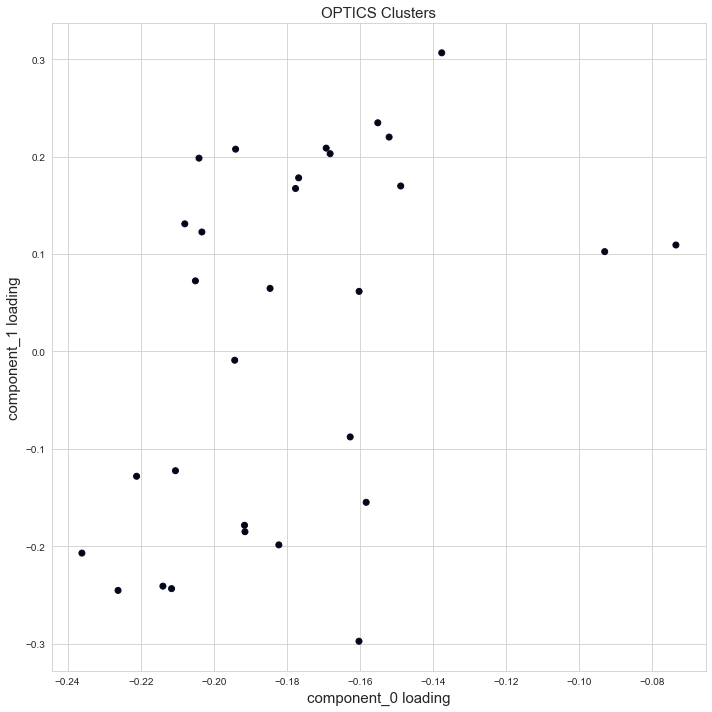

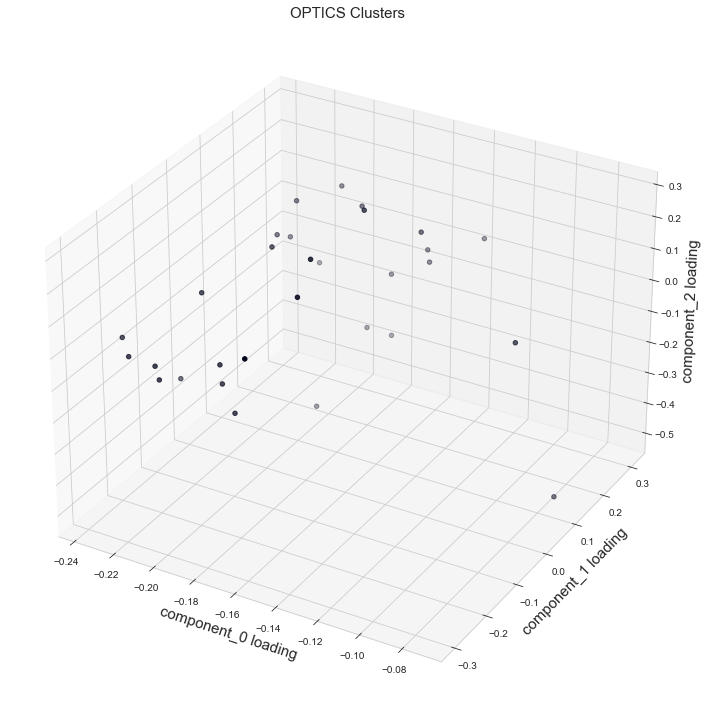

In [132]:
op.plot_clusters(n_dimensions=2)
op.plot_clusters(n_dimensions=3)

In [133]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

In [134]:
op.filter_pairs()
op.filtered_pairs

Found 12 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count
7,"(ACB, HPG)",0.003899,0.183910,18.618691,14.805386
18,"(ACB, SSI)",0.007727,0.292002,20.511736,14.496940
83,"(BVH, VRE)",0.032428,0.317837,27.653479,15.422277
146,"(GAS, POW)",0.048776,0.353512,27.580816,12.646267
166,"(GVR, PDR)",0.018128,0.395786,24.792101,15.730722
174,"(GVR, TPB)",0.036374,0.366195,24.108632,13.263158
237,"(KDH, TPB)",0.034168,0.355290,24.299312,14.805386
274,"(MSN, TPB)",0.043225,0.316555,29.770724,15.422277
320,"(PDR, STB)",0.019199,0.252259,20.194087,19.740514
321,"(PDR, TCB)",0.046377,0.351941,27.815295,22.824969


2022-07-16 09:17:18,927 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:18,951 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:18,981 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:19,002 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:19,025 : INFO : Using categorical units to plot a list of strings that are all parsable as 

2022-07-16 09:17:33,090 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:33,111 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:33,134 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:33,155 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:33,177 : INFO : Using categorical units to plot a list of strings that are all parsable as 

2022-07-16 09:17:48,443 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:48,465 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:48,487 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:51,228 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-16 09:17:51,250 : INFO : Using categorical units to plot a list of strings that are all parsable as 

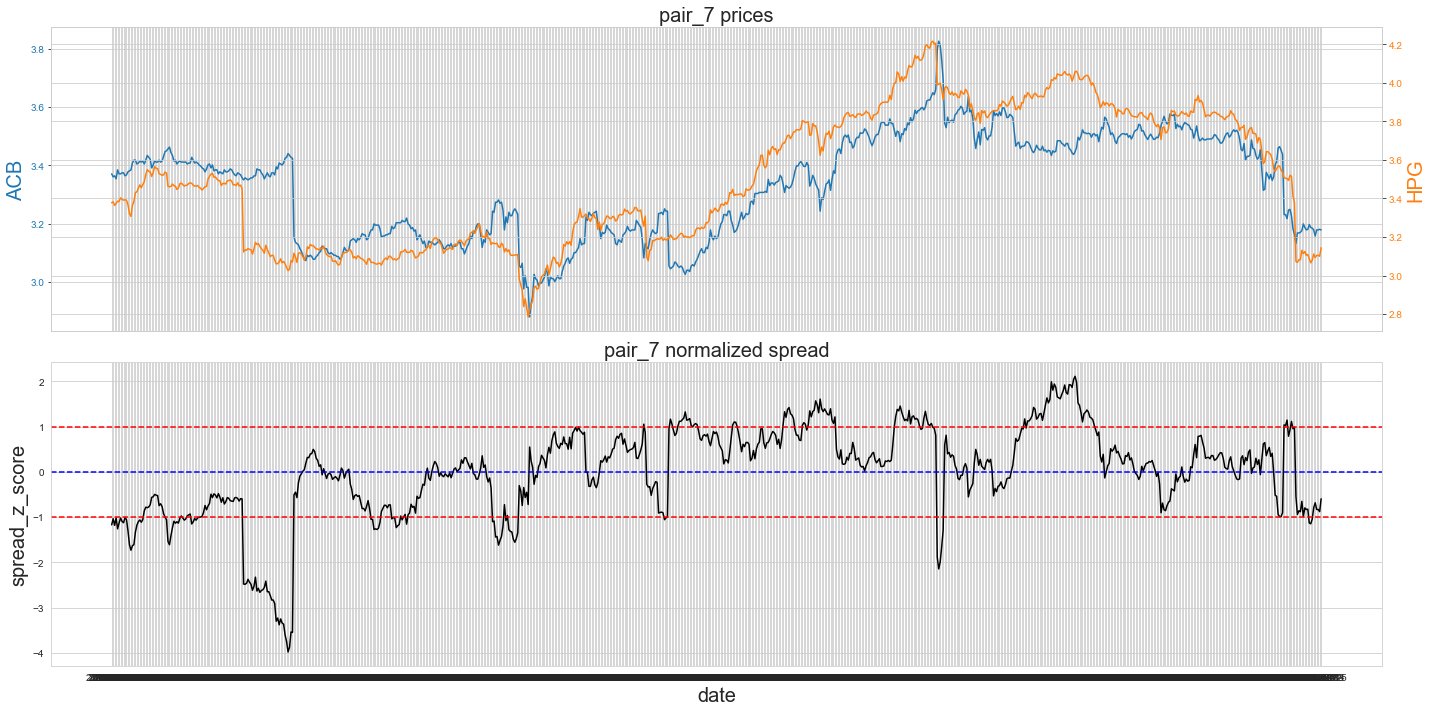

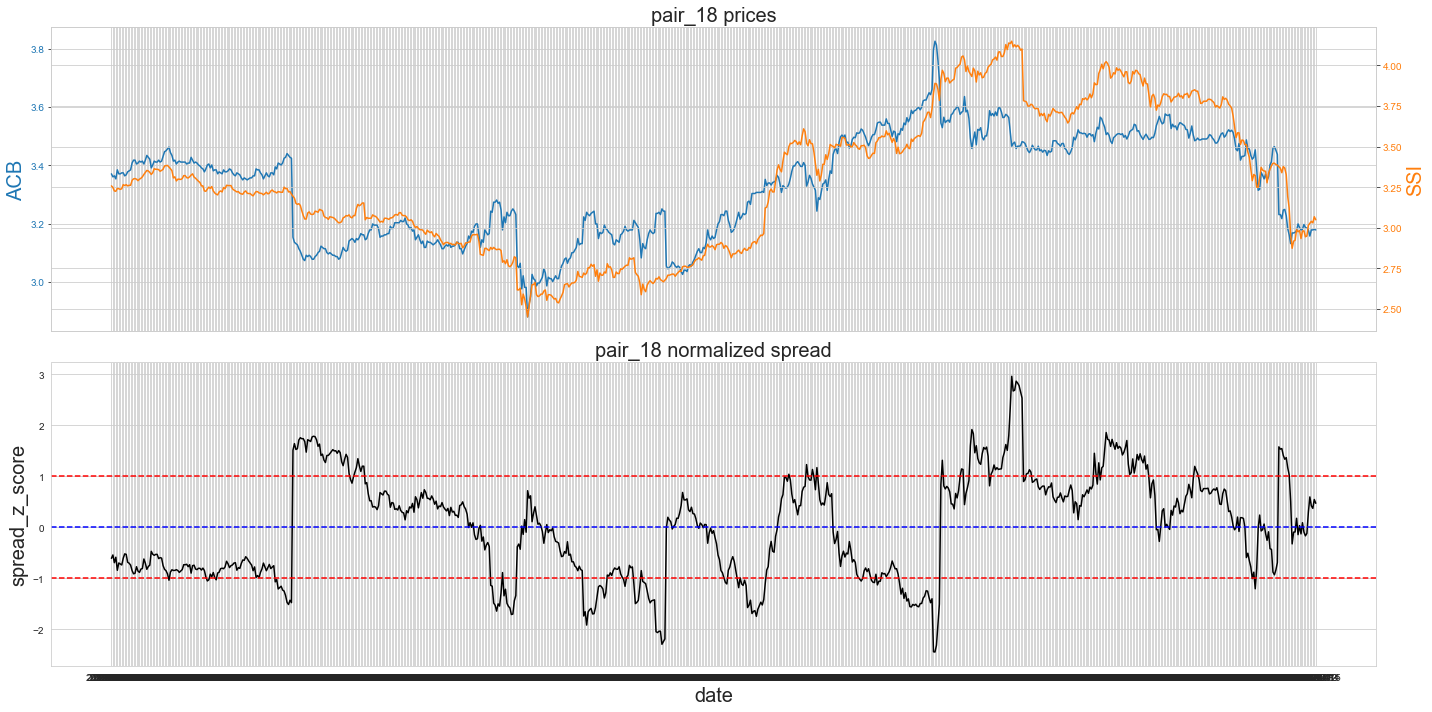

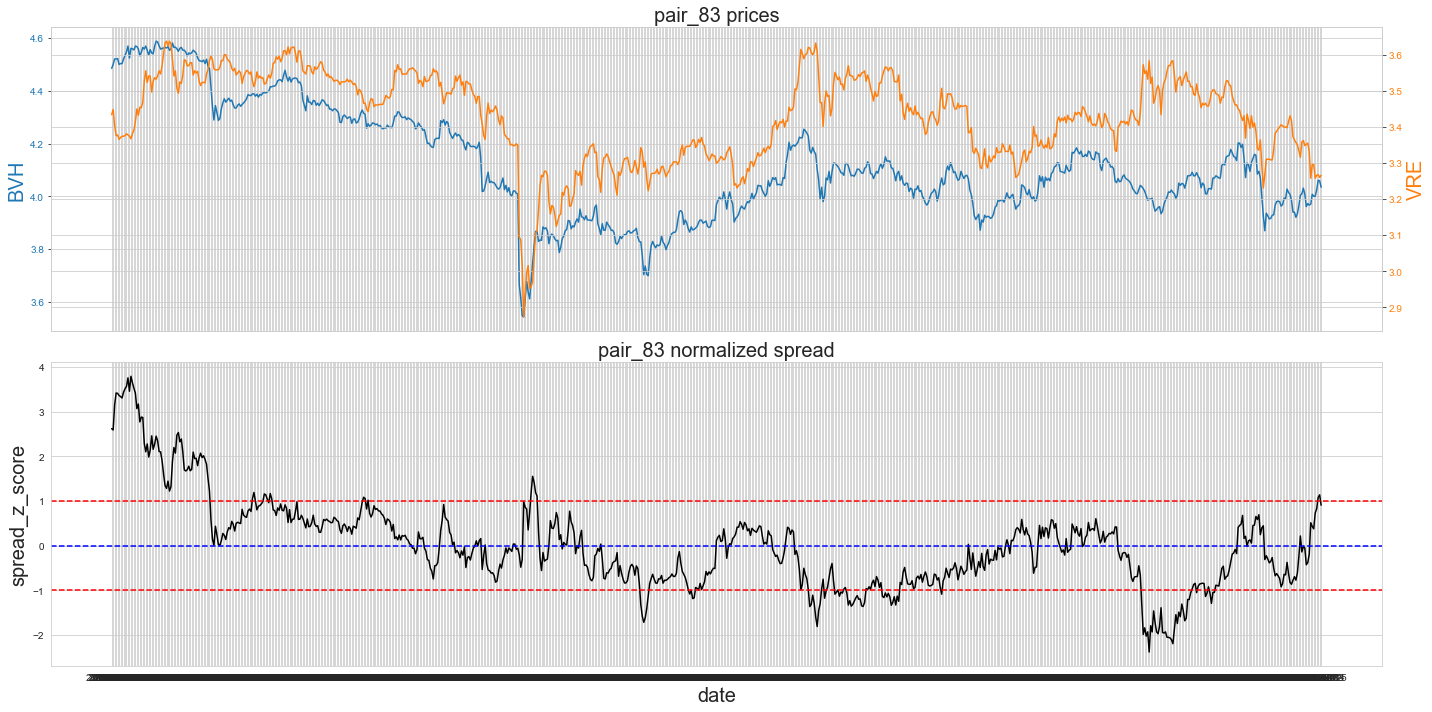

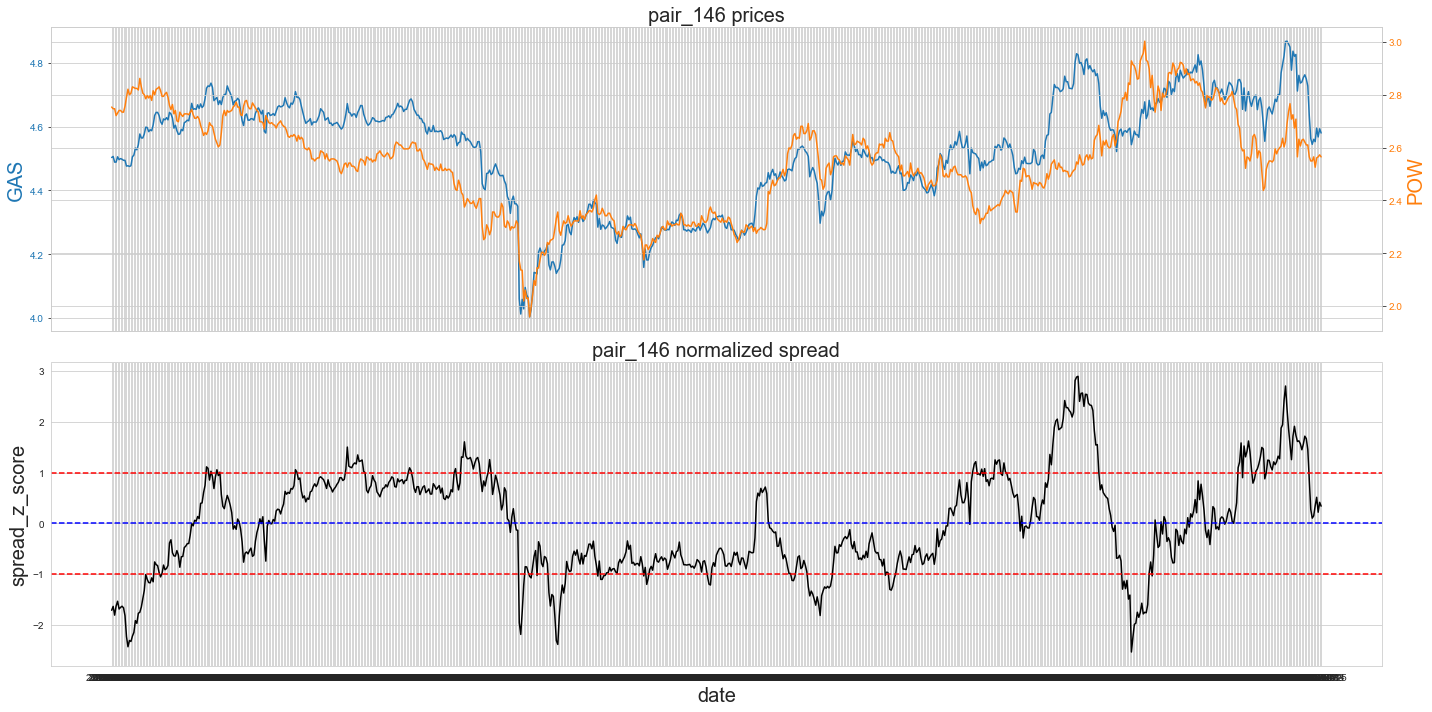

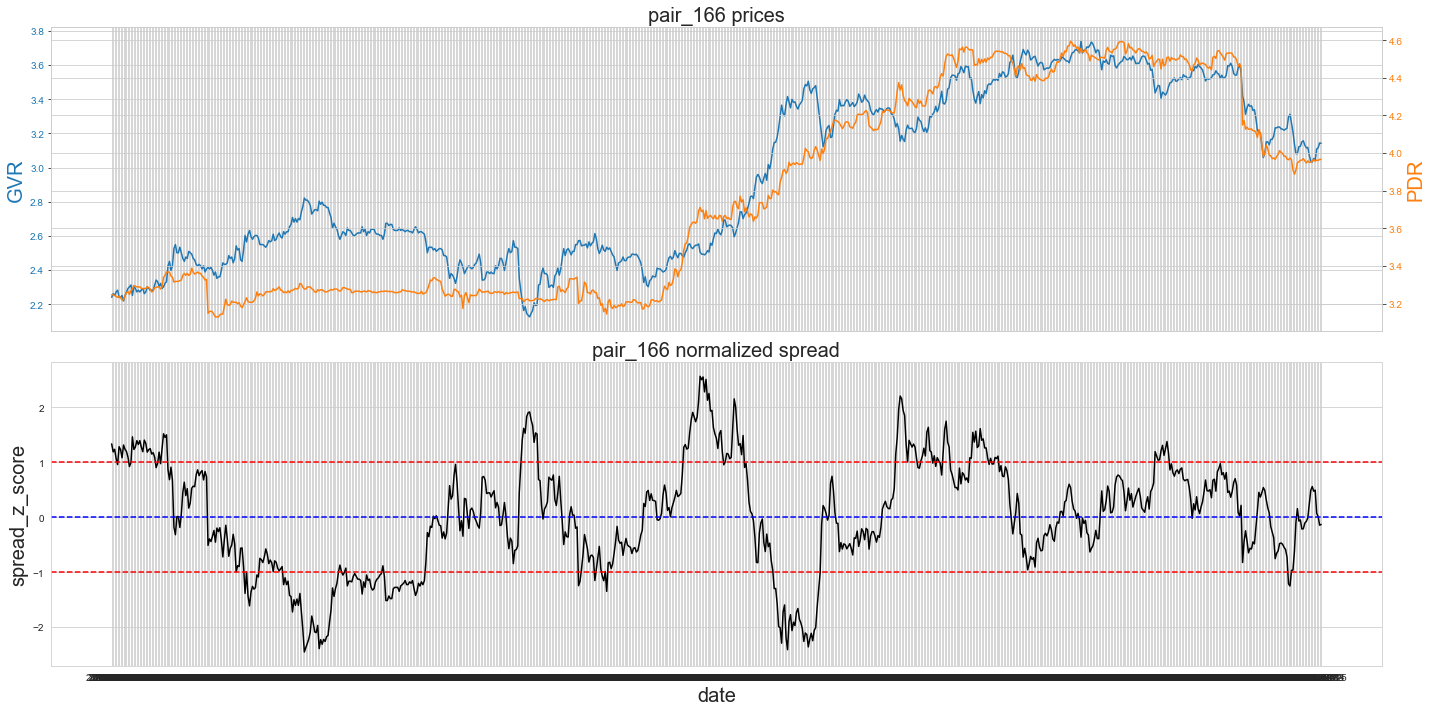

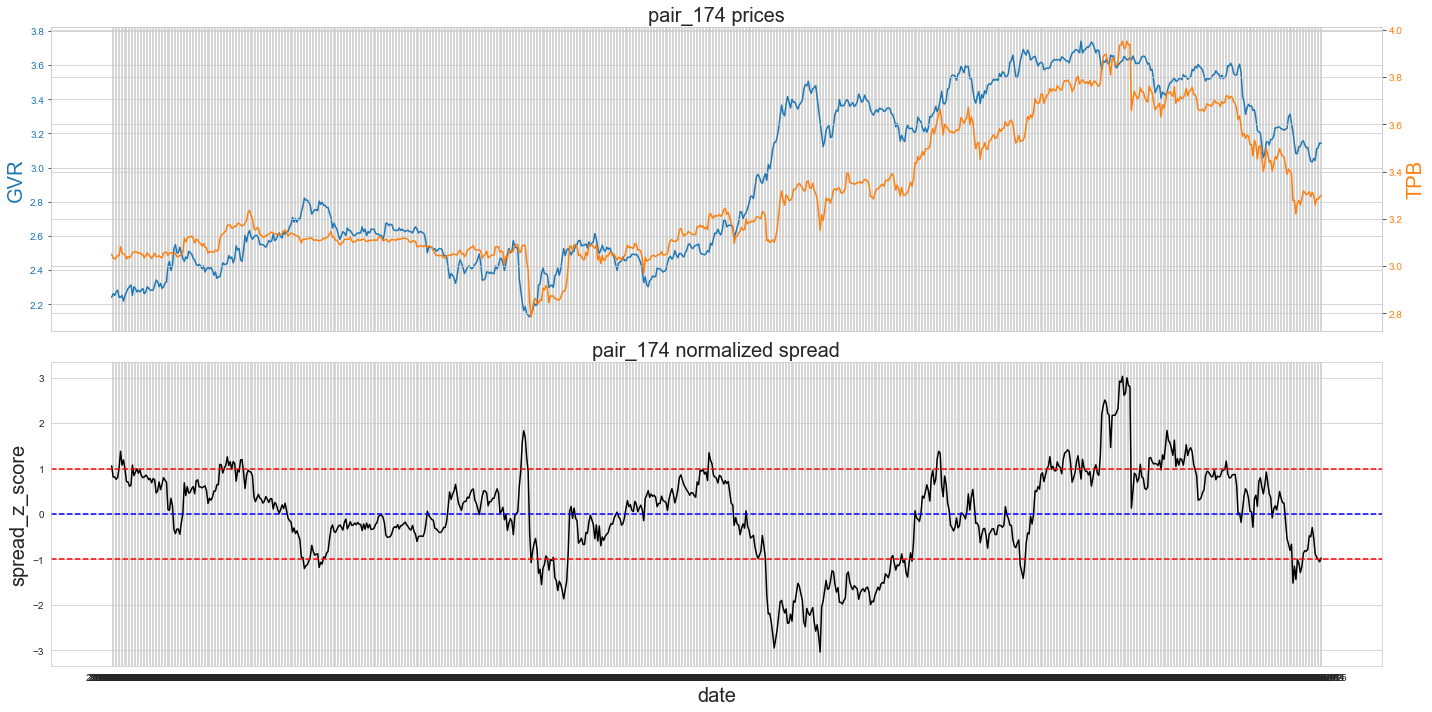

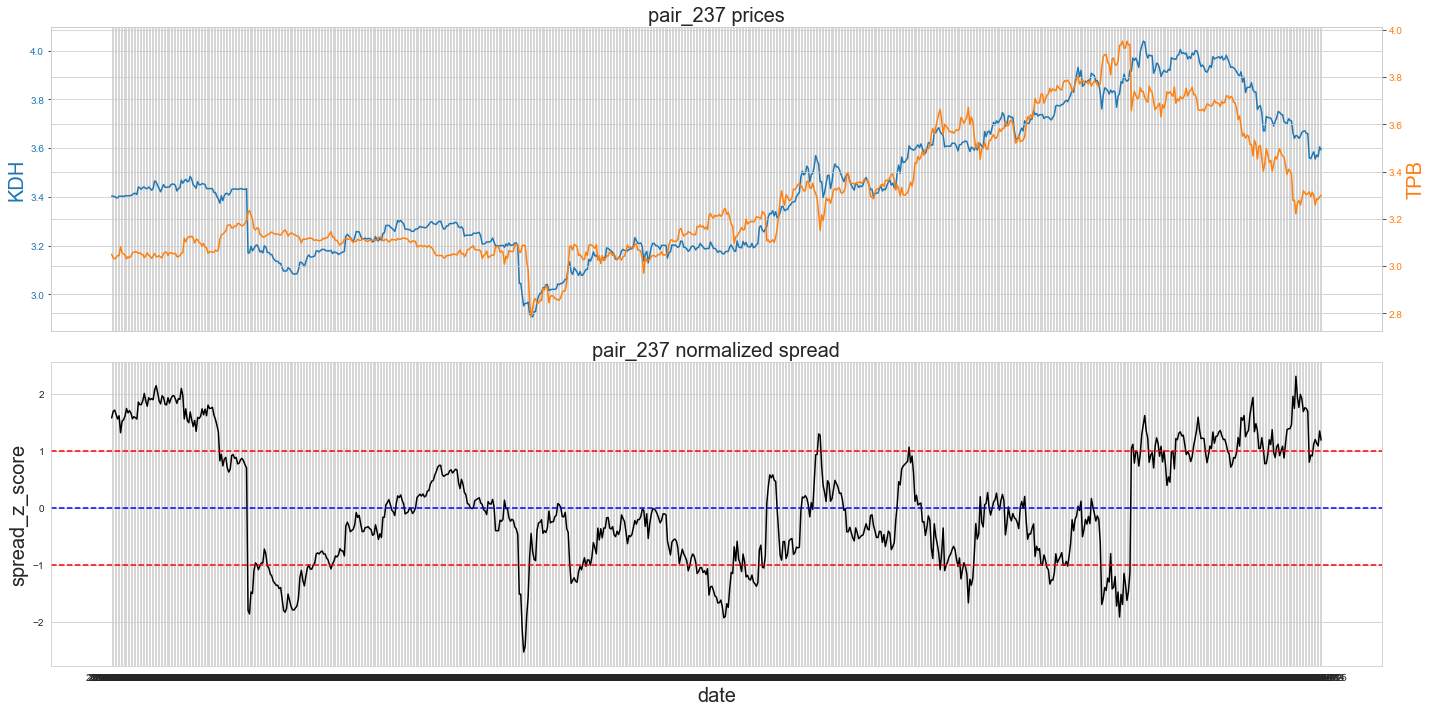

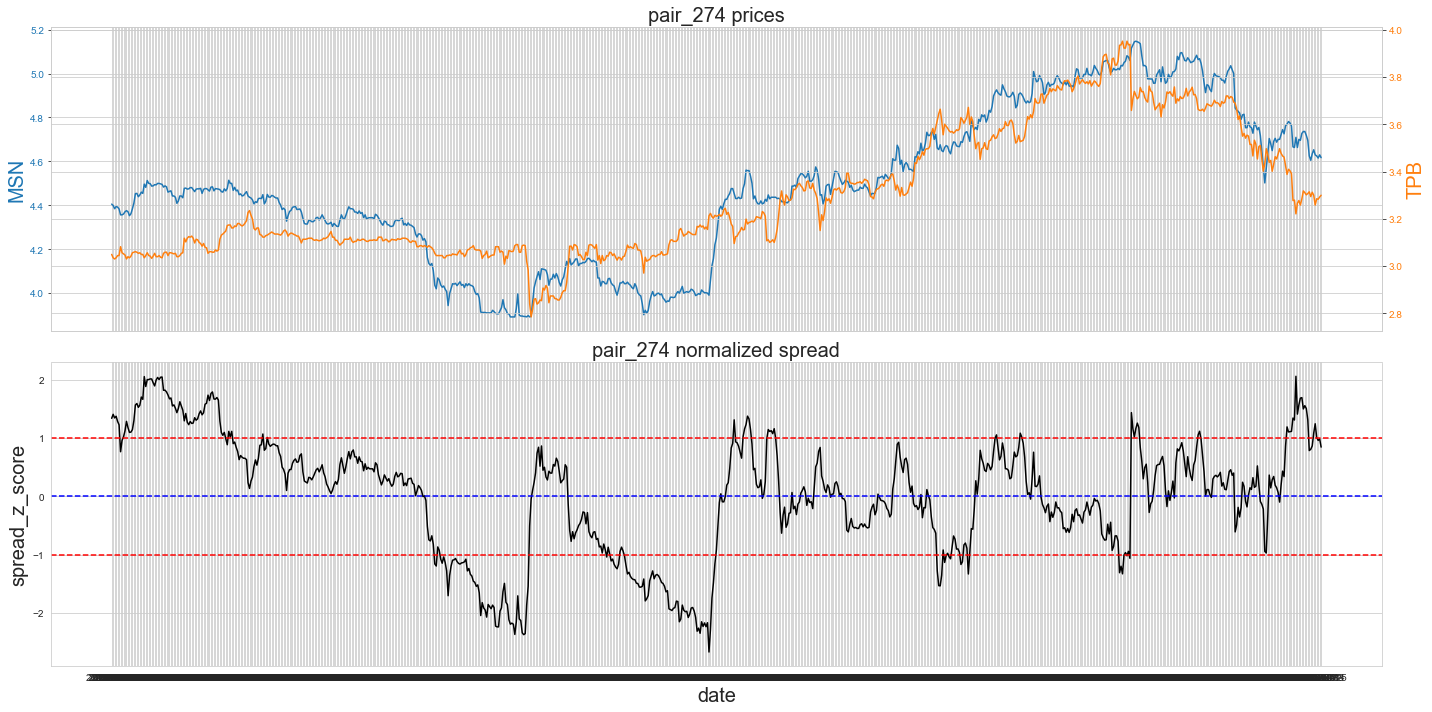

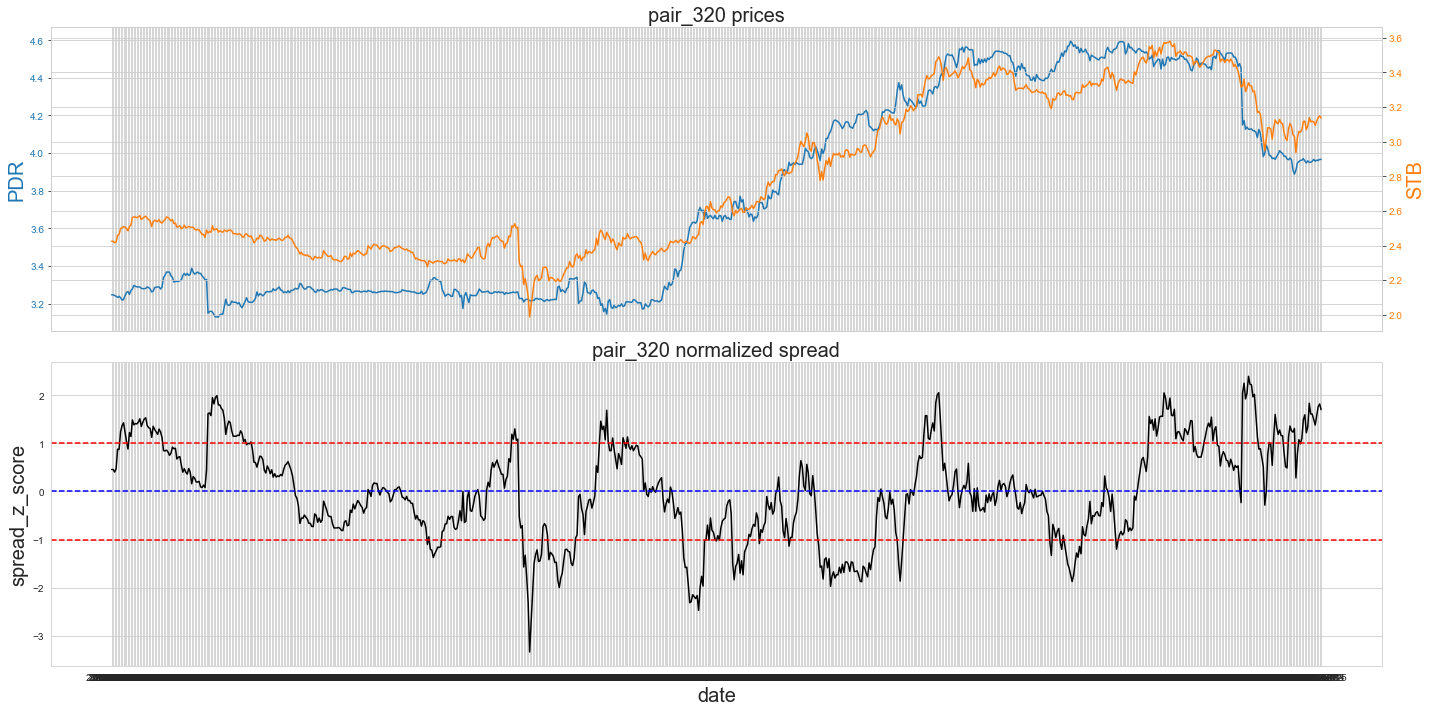

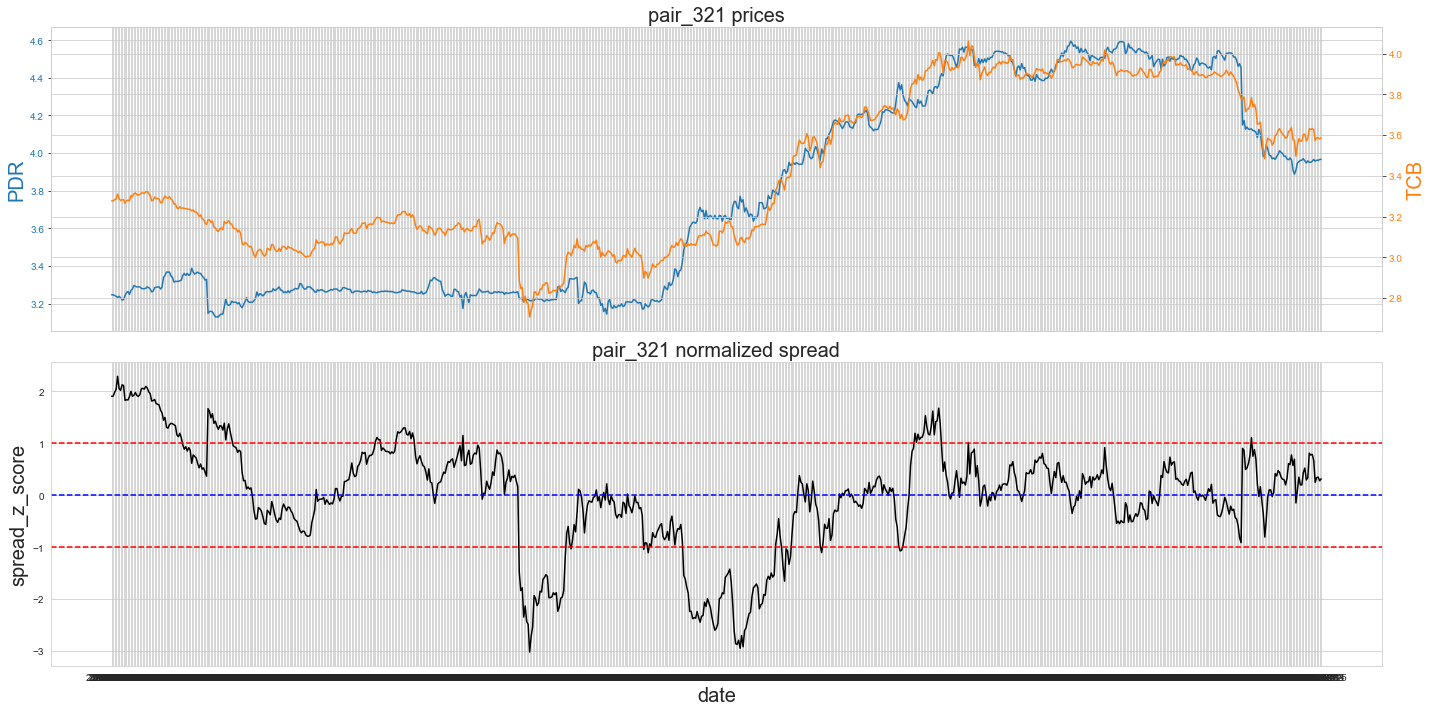

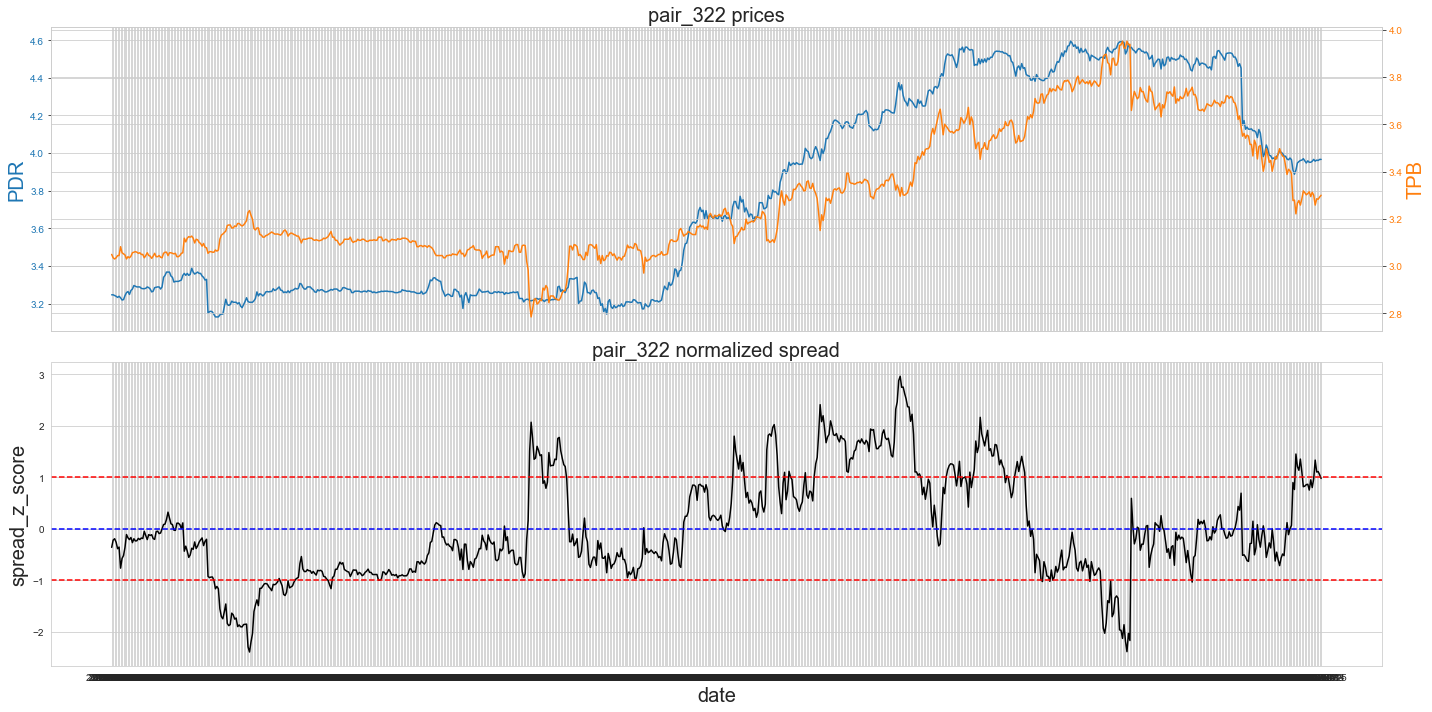

In [ ]:
for i in op.filtered_pairs.index:
    op.plot_pair_price_spread(idx=i)